### Customer Analysis project ###

We will try with available dataset to analyze the customer characteristics and create customer clusters. This will help us to design products and offer according to specific customer characteristics.
Dataset is from [Kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis). Here is also explanation of the available columns.
- we will first analyze the dataset
    - fill or remove missing data (cleaning)
    - check and if needed remove outlier 
    - check the data relations and data distributions 

Try to Answer the questions what customers do:
    - Are there differences between older and younger customers
    - Does Marital status, or Education, or Income, or having Kid or Teen impacts the total spending, 
    - check the  relations between the data
    - try to cluster customer segments - using different clustering techniques 


In [246]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [249]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')

In [248]:
df.info()
#Recency: Number of days since customer's last purchase

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [250]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [251]:
#columns which do not bring any value and could be dropped are ID, Z_Revenue, Z_CostContact 
df.drop(['ID', 'Z_Revenue', 'Z_CostContact'], inplace=True, axis=1)

In [252]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format ="%d-%m-%Y") #date of enrollment of customer

In [253]:
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

### checking outliers and distributions ### 


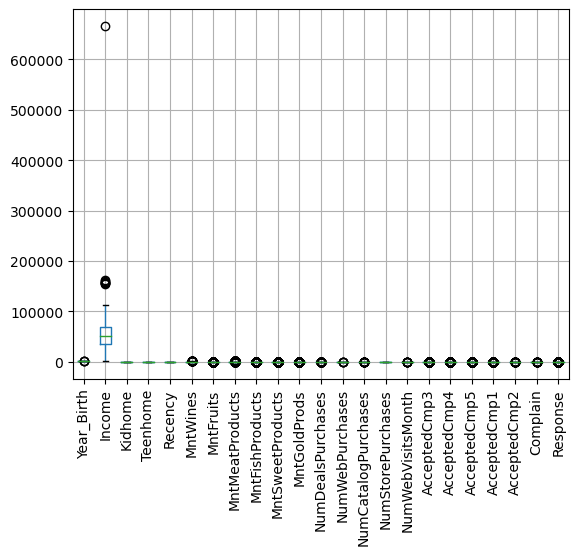

In [68]:
df.boxplot(rot=90)
plt.show()

for income remove outliers first, and remove na rows 

In [254]:
out = df[df['Income']>500000]
df.drop(out.index, inplace=True)
df = df.dropna(axis=0)


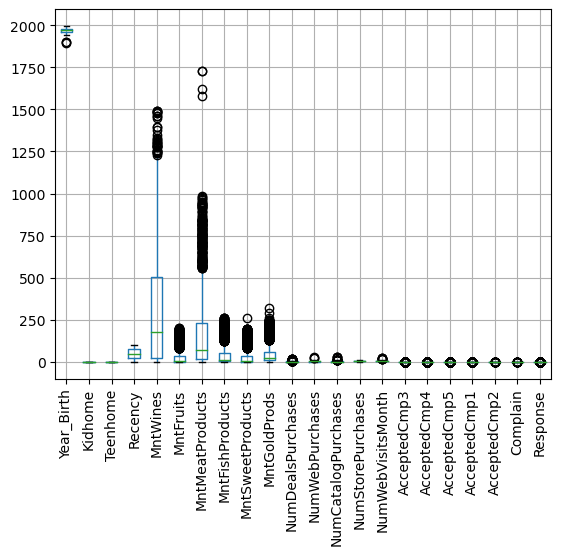

In [255]:
integers = df.select_dtypes(include='int')
integers.boxplot(rot=90)
plt.show()

In [71]:
df.Marital_Status.value_counts()

Married     857
Together    572
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [256]:
strange_status = df[(df['Marital_Status']=='Absurd') | (df['Marital_Status']=='YOLO')]

In [257]:
df.drop(strange_status.index, inplace=True)


In [136]:
df.Response.value_counts()

0    1880
1     331
Name: Response, dtype: int64

In [258]:
#creating total spend column from  Wines, Fruits, Meat, sweet ... gold not since gold is more expensive and thus separate from commodities 
df['total_spent'] =df['MntWines'] + df['MntFruits']+ df['MntFishProducts'] + df['MntSweetProducts']

df['Marital_Status']=df['Marital_Status'].replace({'Alone':'Single','Together':'Partnership', 'Married':'Partnership'})


In [259]:
latest_date = df['Dt_Customer'].max() # check Seniority of customer 
df['customer_seniority'] = (latest_date - df['Dt_Customer']).dt.days
df['kids'] = df['Kidhome'] + df['Teenhome']


In [260]:
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format='%Y').dt.year

In [261]:
df['Age'] = 2014- df['Year_Birth']
df.drop('Year_Birth', axis=1, inplace=True)

In [158]:
#transforming income to categorical variable , but first removing extra low incomes , but this is strange over 10% have ANNUAL income below 25k ?
#DO NOT ADD this Column THIS TIME 
min_inc = df[df["Income"]<25000]
income_bins = ['low', 'average', 'high', 'very high']
df['income_groups'] = pd.cut(df['Income'], 4, labels=income_bins)

In [157]:
df.income_groups.value_counts()

average      1264
low           790
high          150
very high       7
Name: income_groups, dtype: int64

In [262]:
df.drop(['Kidhome', 'Teenhome'], inplace=True, axis=1)

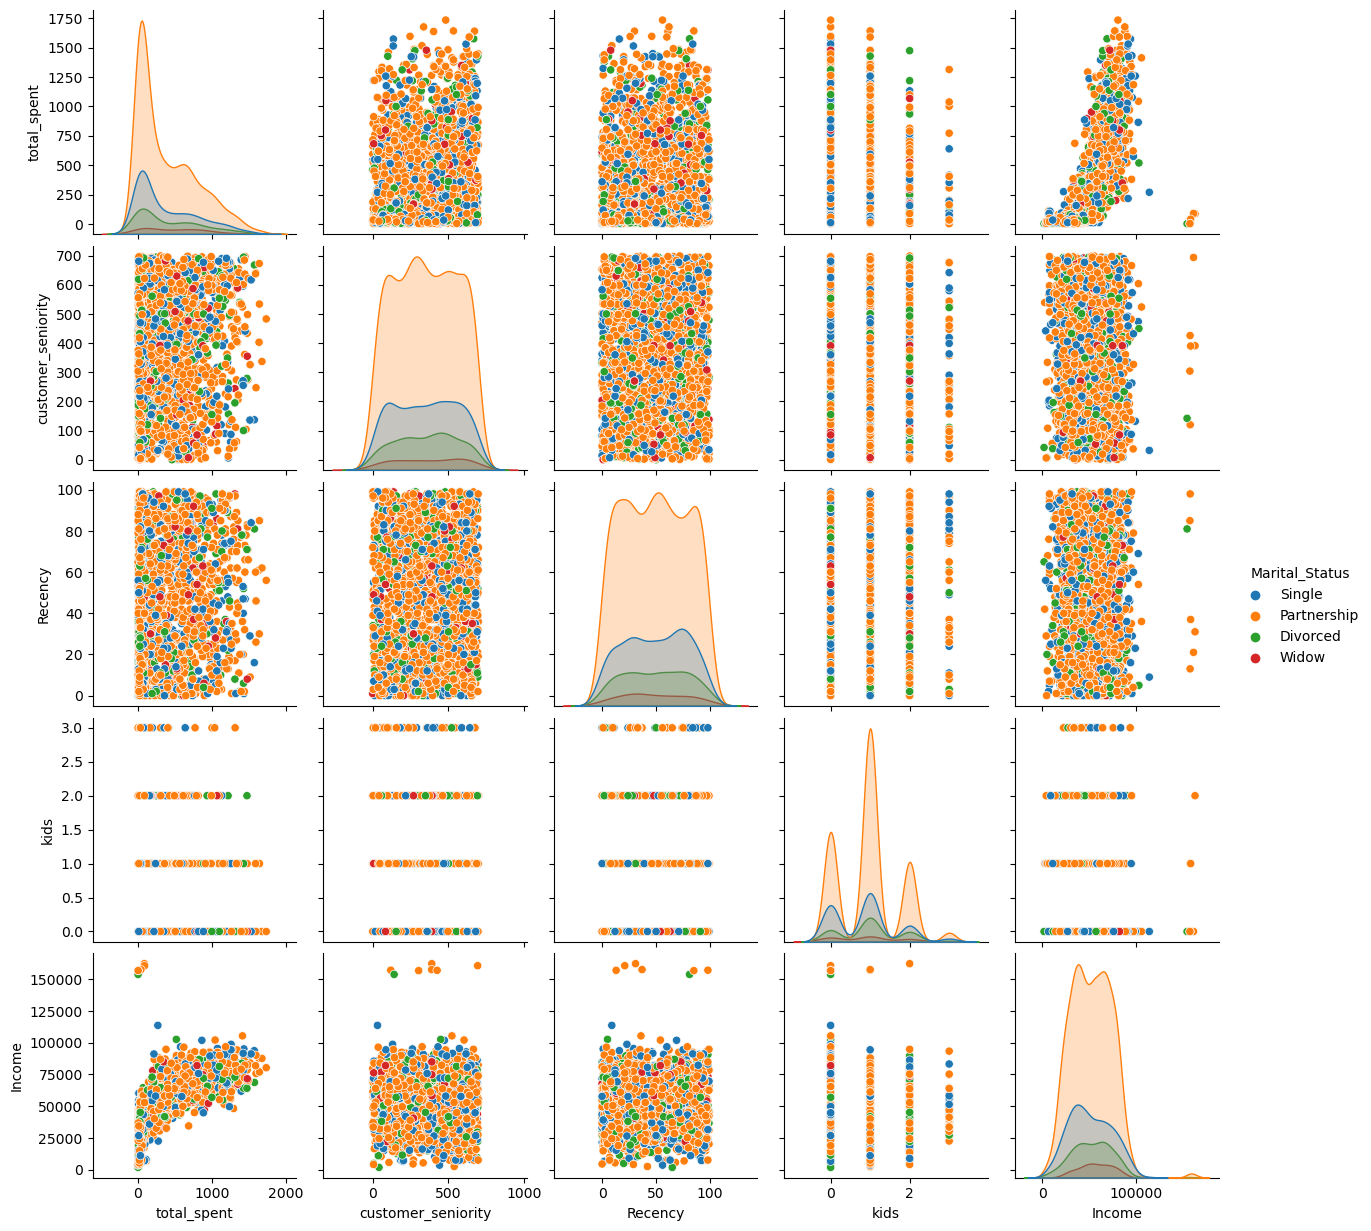

In [57]:

quant = df[['total_spent', 'customer_seniority', 'Recency', 'kids','Income', 'Marital_Status']]
sns.pairplot(quant, hue='Marital_Status')
plt.show()

Persons in partnership of any kind are spending the most, have highest income, and are the oldest customers . When looking connections between the features, there is slightly positive correlation between total spent and Income, for other features there is no evident correlation.


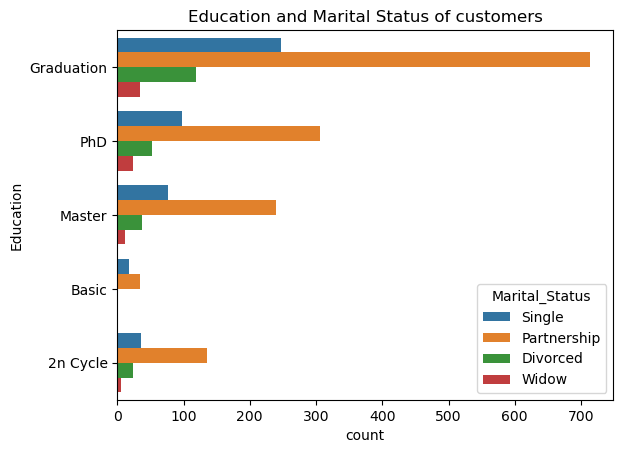

In [90]:
#check education marital status connection 
plt.clf()
sns.countplot(data =df, y = 'Education', hue='Marital_Status')
plt.title('Education and Marital Status of customers')
plt.show()

In [137]:
#responsiveness to campaigns, these are boolean values ,therefore bettter to use countbar 
plt.clf()
campaigns = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Education']]
def qualit_quant_bar_chart(df, title='Distribution of features for different education levels'):
    """
    df: data frame where last column needs to be categorical features, and other numerical(continuos  or discrete)
    title : name of the chart collection 
    returns bar charts for each numerical features, hue for diffferent category (last column)
    """
    f, ax = plt.subplots(1, len(df.columns)-1, figsize=(18,5), sharey=True)
    f.suptitle(title)
    for c in range(len(df.columns[:-1])):
        sns.histplot(data = df, x= df.columns[c], hue=df.columns[-1], ax=ax[c], multiple='stack')
    plt.show()
    plt.clf()




<Figure size 640x480 with 0 Axes>

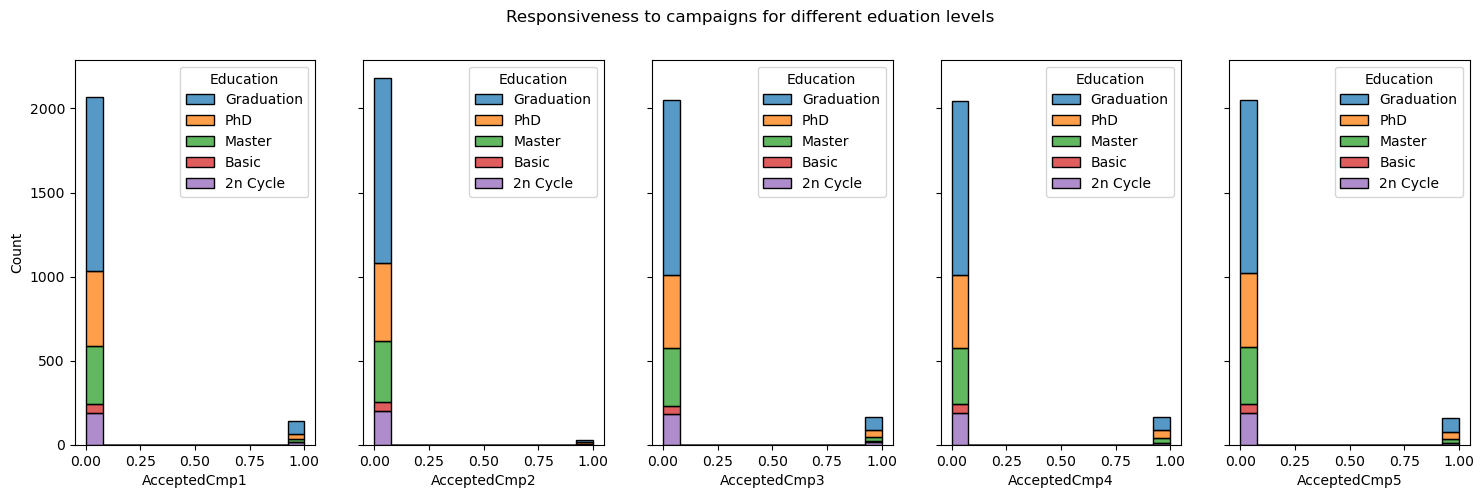

In [138]:
qualit_quant_bar_chart(campaigns, title='Responsiveness to campaigns for different eduation levels')

<Figure size 640x480 with 0 Axes>

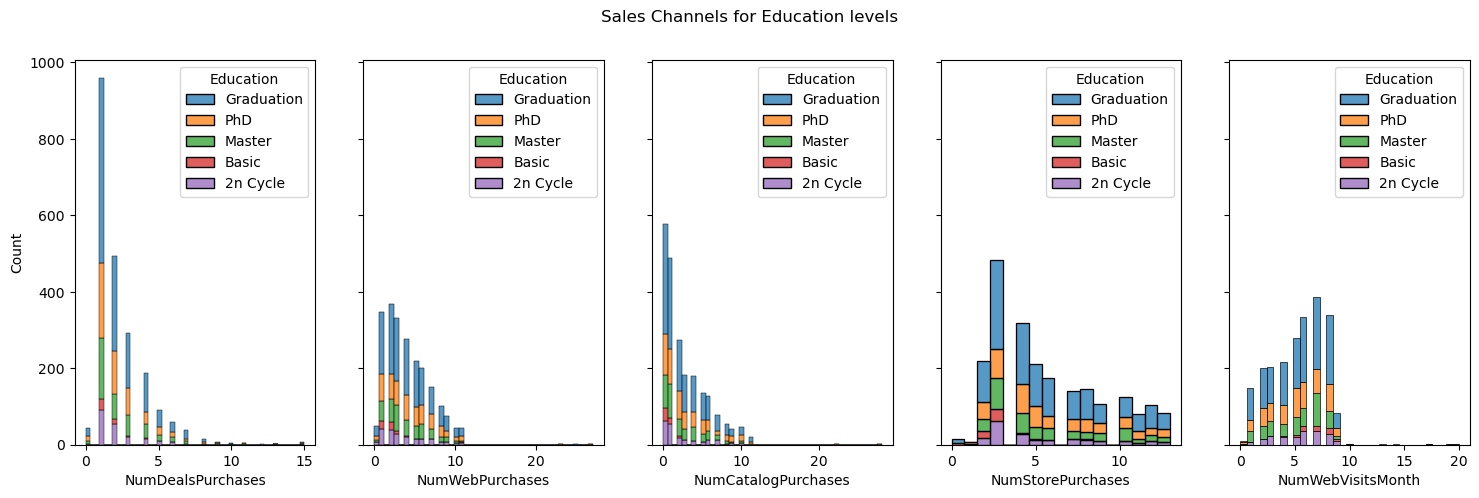

In [132]:
#channels 
channels = df[['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Education']]
qualit_quant_bar_chart(channels, title='Sales Channels for Education levels')

<Figure size 640x480 with 0 Axes>

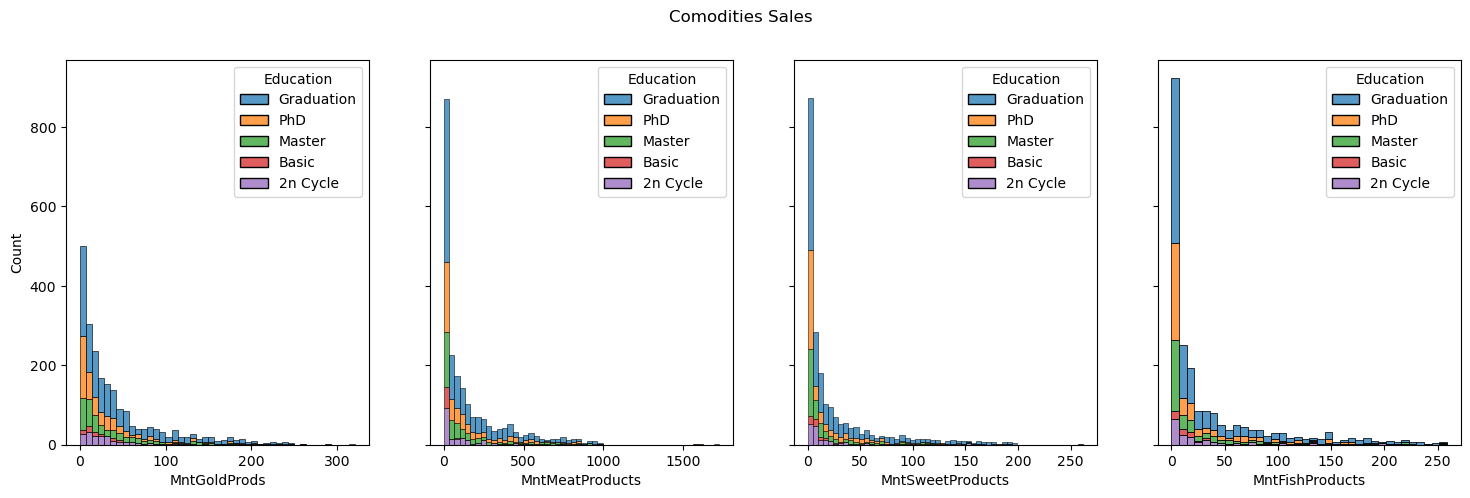

In [127]:
qualit_quant_bar_chart(df[['MntGoldProds', 'MntMeatProducts','MntSweetProducts','MntFishProducts', 'Education']], title='Comodities Sales')



#gold spending

<Figure size 640x480 with 0 Axes>

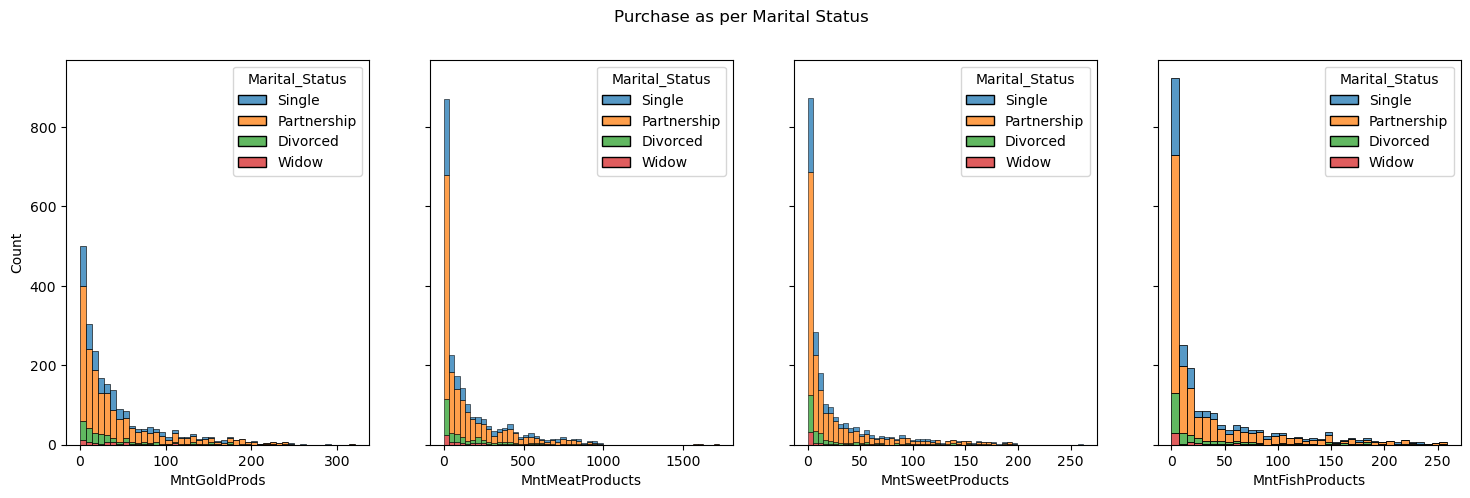

In [133]:
qualit_quant_bar_chart(df[['MntGoldProds', 'MntMeatProducts','MntSweetProducts','MntFishProducts', 'Marital_Status']], 'Purchase as per Marital Status')

<Figure size 640x480 with 0 Axes>

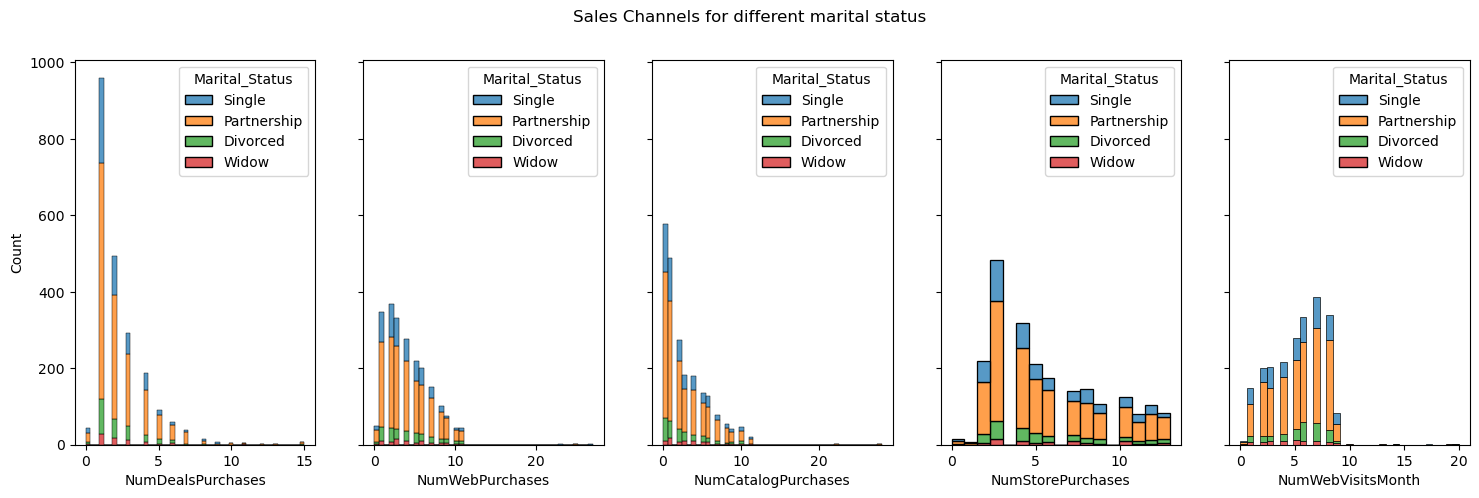

In [134]:
channels = df[['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Marital_Status']]
qualit_quant_bar_chart(channels, title='Sales Channels for different marital status')

In [263]:
# it seems like responsiveness to campaings is not so significant therefore we will drop those columns, as well as response and complain,
# it seems like that purchase of specific goods is not different for different marital statuses nor education levels , not sure about Ages ? 
df.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response', 'Dt_Customer'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2211 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2211 non-null   object 
 1   Marital_Status       2211 non-null   object 
 2   Income               2211 non-null   float64
 3   Recency              2211 non-null   int64  
 4   MntWines             2211 non-null   int64  
 5   MntFruits            2211 non-null   int64  
 6   MntMeatProducts      2211 non-null   int64  
 7   MntFishProducts      2211 non-null   int64  
 8   MntSweetProducts     2211 non-null   int64  
 9   MntGoldProds         2211 non-null   int64  
 10  NumDealsPurchases    2211 non-null   int64  
 11  NumWebPurchases      2211 non-null   int64  
 12  NumCatalogPurchases  2211 non-null   int64  
 13  NumStorePurchases    2211 non-null   int64  
 14  NumWebVisitsMonth    2211 non-null   int64  
 15  total_spent          2211 non-null   i

#### Clustering methods to find different customer groups ####

In [264]:
#we will standardize numerical features, and we will labelize categorical features ,  
# remove Mnd monthly purchase since we have total_spent column
#bring together in one df, 
#build dendogram to check suggested number of clusters 

#we will try KMeans clustering as starting point and then Agglomerative HCA


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN 


Since we already have column total_spent, which sums all products spent except the Gold, we will drop these columns in the  further analysis.

In [208]:
df.drop(['MntFruits', 'MntFishProducts', 'MntMeatProducts','MntSweetProducts', 'MntWines'], axis=1, inplace=True)

Dataset will be split in the numerical and categorical features, and for cluster analysis we will use only numerical dataset 

In [267]:
nums = df.select_dtypes(include =['int','float'])
cats = df.select_dtypes(include =['object', 'category'])

In [269]:
scaler =StandardScaler()
encoder = LabelEncoder()

nums[nums.columns] = pd.DataFrame(scaler.fit_transform(nums), index = nums.index) # index needs to match


In [272]:
nums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2211 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2211 non-null   float64
 1   Recency              2211 non-null   float64
 2   MntGoldProds         2211 non-null   float64
 3   NumDealsPurchases    2211 non-null   float64
 4   NumWebPurchases      2211 non-null   float64
 5   NumCatalogPurchases  2211 non-null   float64
 6   NumStorePurchases    2211 non-null   float64
 7   NumWebVisitsMonth    2211 non-null   float64
 8   total_spent          2211 non-null   float64
 9   customer_seniority   2211 non-null   float64
 10  kids                 2211 non-null   float64
 11  Age                  2211 non-null   float64
dtypes: float64(12)
memory usage: 224.6 KB


In [275]:
#calculate number of centroids using Distortion method = average sum of squared (euclidean)distances from the respective clusters to each data point 
#intertia 1/ n *sum(distance(point, centroid)**2)
distances =[]
inertias = []
from scipy.spatial.distance import cdist
ks = range(1,10)
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(nums)
    distances.append(np.min(cdist(nums, kmeans.cluster_centers_, 'euclidean')/nums.shape[0]))
    inertias.append(kmeans.inertia_)



/home/tm/anaconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tm/anaconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tm/anaconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tm/anaconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

/home/tm/anaconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tm/anaconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tm/anaconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tm/anaconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

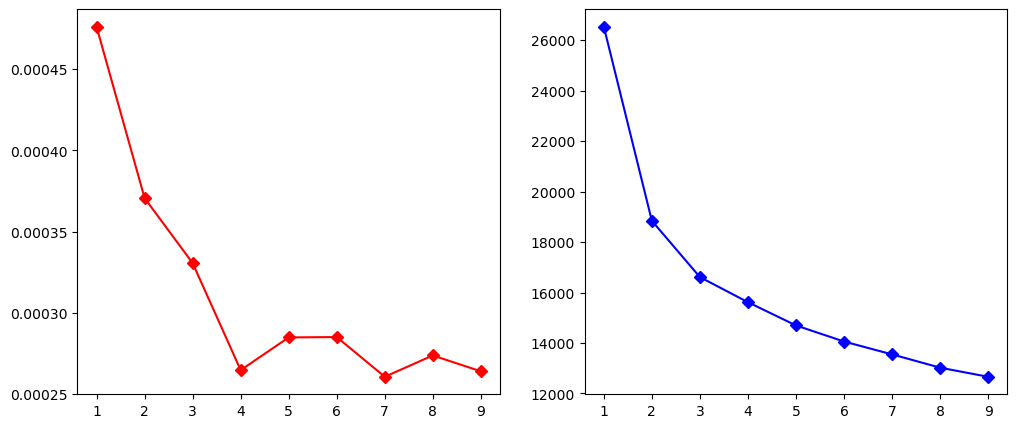

In [276]:
f,a = plt.subplots(1,2,figsize=(12,5))
a[0].plot(ks, distances, 'r-D')
a[1].plot(ks, inertias, 'b-D')
plt.show()
plt.clf()

we will try with 4 clusters

In [281]:
k4 = KMeans(n_clusters=4)
k4.fit(nums)
nums['clusters'] = k4.labels_

/home/tm/anaconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


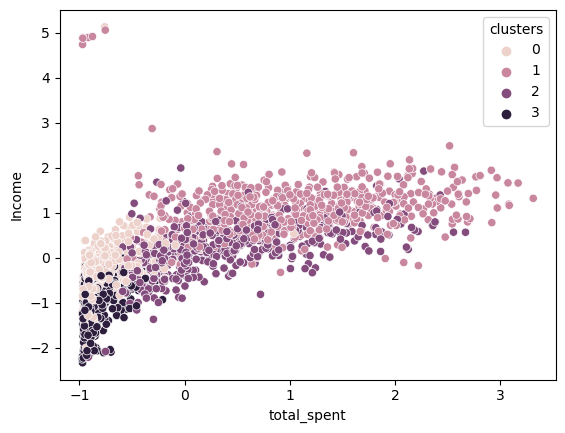

In [282]:
sns.scatterplot(data=nums, x='total_spent', y='Income', hue='clusters')
plt.show()

With KMeans clustering, there are visible 4 clearly separated clusters: 
- Groups 0, and 3: users with lower spending habits, Group3 having lower income than Group0
- Groups 1 and 2: Main different of these 2 groups is level of income, while spending volume seems to be similar    

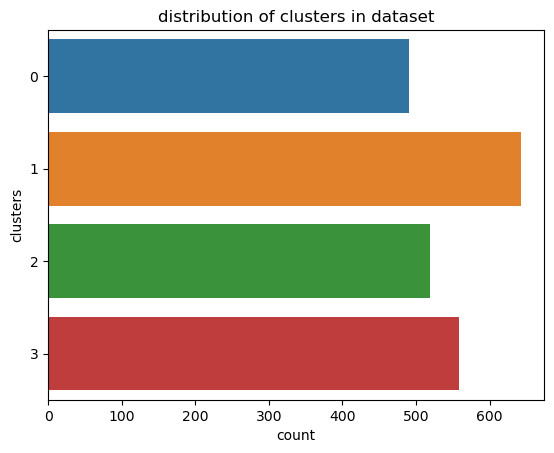

In [283]:
plt.clf()
sns.countplot(nums, y='clusters')
plt.title('distribution of clusters in dataset')
plt.show()

#### DBSCAN (Density Based Spatial Clustering)
- used to discover the clusters; they are defined based on density data points in the feature space
- To find clusters, several factors come in play; number of data, number of features(dimensions)
- Whan needs to be defined is Epsilon (threshold between two points under which they are classified as neighbors), MinPnts min number of points for 1 cluster
- Good for data which contains clusters of similar density.


In [284]:
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels =dbscan.fit_predict(nums)
nums['dbscan_labels'] = dbscan_labels


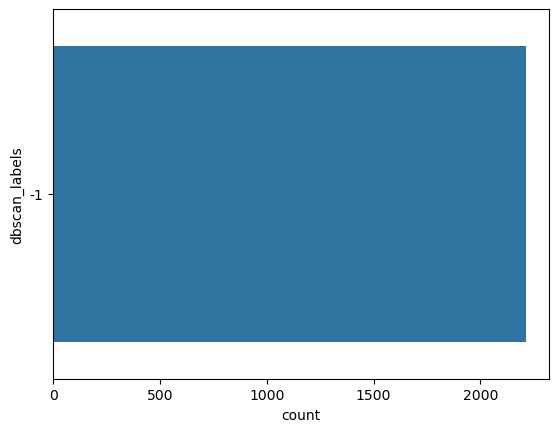

In [285]:
sns.countplot(data, y='dbscan_labels')
plt.show()

DBSCAN was not able to create meaningful results

#### Hierarchical Clustering 
- Bottom up approach, start is each data point is it's own cluster
- Through iterations data points merge to closest clusters based on distance metrics - default is euclidean
- Default linkage between sets of observation is wart. This criterion needs to be minimized in order for data to merge. Ward minimizes variance of clusters beeing merged   


In [286]:
#hierarchical clustering 
from sklearn.cluster import AgglomerativeClustering

aglo = AgglomerativeClustering(n_clusters=4) # default linkage is ward ,which distance to use between sets of observation.
aglo.fit(nums.iloc[:,:-2])
aglo_labels = aglo.labels_
labels1 = aglo.fit_predict(nums.iloc[:, :-2])



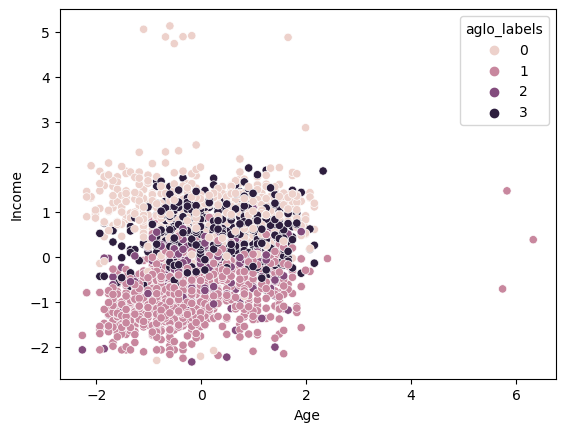

In [289]:
nums['aglo_labels'] = aglo_labels
sns.scatterplot(nums, x='Age', y='Income', hue='aglo_labels')
plt.show()

it is evident that all 4 clusters have customers in entire age range, however we see differentiation as per income size  

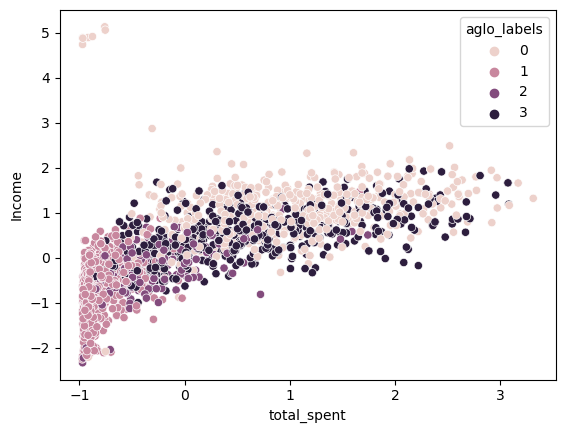

In [290]:
sns.scatterplot(nums, x='total_spent', y='Income', hue='aglo_labels')
plt.show()

If we observe same features where now clusters are formed with Agglomerative clustering method(recursive ), we can see that clusters are formed differently:
- Group1 are customers with lower to average income with lower spending
- Group2 have customers with still lower income but who spend more 
- Group3 have average or higher income and spend more 
- Group0 customers who spend the most and have highest income  